In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings(action='ignore')

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm

from sklearn.preprocessing import LabelEncoder

import fbprophet
from fbprophet import Prophet

from scipy import signal

import matplotlib as mat
print(mat.rcParams['font.family'])
plt.rc('font', family='Malgun Gothic')

['Malgun Gothic']


In [171]:
df = pd.read_excel('mydf.xlsx')
df

,H_ID,HA,ST_DATE,APT_TF,H00,H01,H02,H03,H04,H05,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,total
0,9,TV,2011-12-17,비아파트,0.018,0.003,0.002,0.003,0.003,0.003,...,0.002,0.003,0.003,0.003,0.002,0.003,0.003,0.003,0.002,0.081
1,13,TV,2011-12-19,비아파트,0.066,0.059,0.055,0.050,0.047,0.040,...,0.051,0.063,0.071,0.049,0.090,0.023,0.023,0.093,0.096,1.392
2,13,TV,2011-12-20,비아파트,0.022,0.046,0.022,0.023,0.023,0.022,...,0.023,0.023,0.022,0.023,0.023,0.022,0.098,0.118,0.119,0.955
3,9,TV,2011-12-21,비아파트,0.039,0.027,0.003,0.003,0.023,0.003,...,0.003,0.003,0.018,0.038,0.037,0.030,0.003,0.003,0.008,0.266
4,13,TV,2011-12-21,비아파트,0.060,0.120,0.118,0.120,0.120,0.106,...,0.023,0.023,0.022,0.023,0.023,0.102,0.121,0.109,0.023,1.501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6950,229,TV,2012-10-14,비아파트,0.084,0.104,0.006,0.005,0.006,0.006,...,0.006,0.022,0.109,0.107,0.110,0.110,0.110,0.103,0.081,1.215
6951,230,TV,2012-10-14,비아파트,0.058,0.045,0.039,0.002,0.000,0.000,...,0.009,0.009,0.009,0.033,0.043,0.051,0.046,0.045,0.050,0.529
6952,245,TV,2012-10-14,비아파트,0.002,0.001,0.002,0.001,0.001,0.002,...,0.002,0.001,0.001,0.002,0.001,0.001,0.002,0.001,0.002,0.034
6953,249,TV,2012-10-14,비아파트,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.051


In [166]:
df['ST_DATE'] = pd.to_datetime(df['ST_DATE'])

In [167]:
le = LabelEncoder()
cols = ['HA', 'APT_TF']
for i in cols:
    df[i] = le.fit_transform(df[i])
df

,H_ID,HA,ST_DATE,APT_TF,H00,H01,H02,H03,H04,H05,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,total
0,9,0,2011-12-17,0,0.018,0.003,0.002,0.003,0.003,0.003,...,0.002,0.003,0.003,0.003,0.002,0.003,0.003,0.003,0.002,0.081
1,13,0,2011-12-19,0,0.066,0.059,0.055,0.050,0.047,0.040,...,0.051,0.063,0.071,0.049,0.090,0.023,0.023,0.093,0.096,1.392
2,13,0,2011-12-20,0,0.022,0.046,0.022,0.023,0.023,0.022,...,0.023,0.023,0.022,0.023,0.023,0.022,0.098,0.118,0.119,0.955
3,9,0,2011-12-21,0,0.039,0.027,0.003,0.003,0.023,0.003,...,0.003,0.003,0.018,0.038,0.037,0.030,0.003,0.003,0.008,0.266
4,13,0,2011-12-21,0,0.060,0.120,0.118,0.120,0.120,0.106,...,0.023,0.023,0.022,0.023,0.023,0.102,0.121,0.109,0.023,1.501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6950,229,0,2012-10-14,0,0.084,0.104,0.006,0.005,0.006,0.006,...,0.006,0.022,0.109,0.107,0.110,0.110,0.110,0.103,0.081,1.215
6951,230,0,2012-10-14,0,0.058,0.045,0.039,0.002,0.000,0.000,...,0.009,0.009,0.009,0.033,0.043,0.051,0.046,0.045,0.050,0.529
6952,245,0,2012-10-14,0,0.002,0.001,0.002,0.001,0.001,0.002,...,0.002,0.001,0.001,0.002,0.001,0.001,0.002,0.001,0.002,0.034
6953,249,0,2012-10-14,0,0.002,0.002,0.002,0.002,0.002,0.002,...,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.002,0.051


In [168]:
train = df[df['ST_DATE']<'2012-09-15']
test = df[df['ST_DATE']>='2012-09-15']

In [169]:
answer = test['total']
test = test.drop('total', axis=1)

In [170]:
train.set_index('ST_DATE', inplace=True)
train

,H_ID,HA,APT_TF,H00,H01,H02,H03,H04,H05,H06,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,total
ST_DATE,,,,,,,,,,,,,,,,,,,,,
2011-12-17,9,0,0,0.018,0.003,0.002,0.003,0.003,0.003,0.002,...,0.002,0.003,0.003,0.003,0.002,0.003,0.003,0.003,0.002,0.081
2011-12-19,13,0,0,0.066,0.059,0.055,0.050,0.047,0.040,0.085,...,0.051,0.063,0.071,0.049,0.090,0.023,0.023,0.093,0.096,1.392
2011-12-20,13,0,0,0.022,0.046,0.022,0.023,0.023,0.022,0.065,...,0.023,0.023,0.022,0.023,0.023,0.022,0.098,0.118,0.119,0.955
2011-12-21,9,0,0,0.039,0.027,0.003,0.003,0.023,0.003,0.003,...,0.003,0.003,0.018,0.038,0.037,0.030,0.003,0.003,0.008,0.266
2011-12-21,13,0,0,0.060,0.120,0.118,0.120,0.120,0.106,0.119,...,0.023,0.023,0.022,0.023,0.023,0.102,0.121,0.109,0.023,1.501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-14,230,0,0,0.037,0.003,0.001,0.002,0.001,0.001,0.002,...,0.004,0.001,0.007,0.008,0.006,0.005,0.001,0.006,0.047,0.231
2012-09-14,231,0,0,0.356,0.006,0.001,0.003,0.001,0.000,0.000,...,0.000,0.001,0.000,0.051,0.378,0.333,0.320,0.342,0.307,2.260
2012-09-14,245,0,0,0.001,0.002,0.001,0.002,0.001,0.001,0.002,...,0.001,0.034,0.007,0.001,0.002,0.001,0.001,0.002,0.001,0.076


In [164]:
mean_df = df['total'].resample('1D').mean()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

<AxesSubplot:xlabel='ST_DATE'>

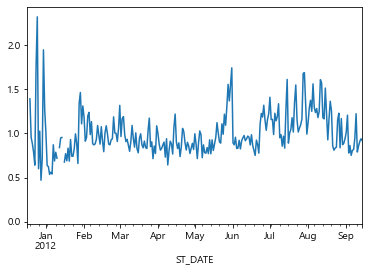

In [93]:
mean_df.plot()

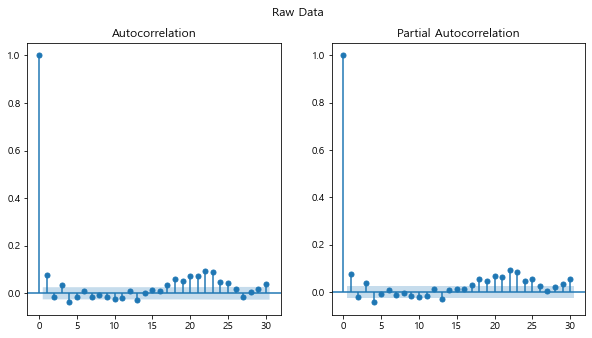

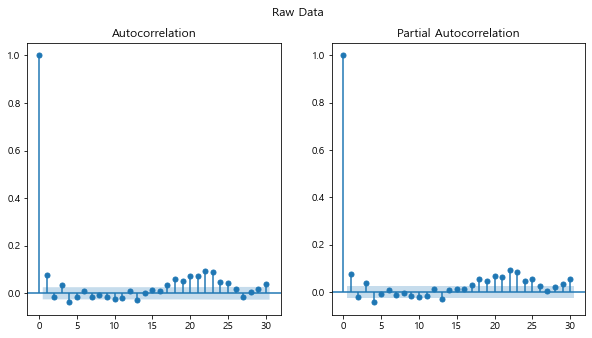

In [97]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Raw Data')
sm.graphics.tsa.plot_acf(train['total'].values.squeeze(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(train['total'].values.squeeze(), lags=30, ax=ax[1])

In [98]:
diff_df = train.copy()
diff_df['total'] = diff_df['total'].diff()
diff_df.dropna()
diff_df

,H_ID,HA,APT_TF,H00,H01,H02,H03,H04,H05,H06,...,H15,H16,H17,H18,H19,H20,H21,H22,H23,total
ST_DATE,,,,,,,,,,,,,,,,,,,,,
2011-12-17,9,0,0,0.018,0.003,0.002,0.003,0.003,0.003,0.002,...,0.002,0.003,0.003,0.003,0.002,0.003,0.003,0.003,0.002,NaN
2011-12-19,13,0,0,0.066,0.059,0.055,0.050,0.047,0.040,0.085,...,0.051,0.063,0.071,0.049,0.090,0.023,0.023,0.093,0.096,1.311
2011-12-20,13,0,0,0.022,0.046,0.022,0.023,0.023,0.022,0.065,...,0.023,0.023,0.022,0.023,0.023,0.022,0.098,0.118,0.119,-0.437
2011-12-21,9,0,0,0.039,0.027,0.003,0.003,0.023,0.003,0.003,...,0.003,0.003,0.018,0.038,0.037,0.030,0.003,0.003,0.008,-0.689
2011-12-21,13,0,0,0.060,0.120,0.118,0.120,0.120,0.106,0.119,...,0.023,0.023,0.022,0.023,0.023,0.102,0.121,0.109,0.023,1.235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-14,230,0,0,0.037,0.003,0.001,0.002,0.001,0.001,0.002,...,0.004,0.001,0.007,0.008,0.006,0.005,0.001,0.006,0.047,-0.423
2012-09-14,231,0,0,0.356,0.006,0.001,0.003,0.001,0.000,0.000,...,0.000,0.001,0.000,0.051,0.378,0.333,0.320,0.342,0.307,2.029
2012-09-14,245,0,0,0.001,0.002,0.001,0.002,0.001,0.001,0.002,...,0.001,0.034,0.007,0.001,0.002,0.001,0.001,0.002,0.001,-2.184


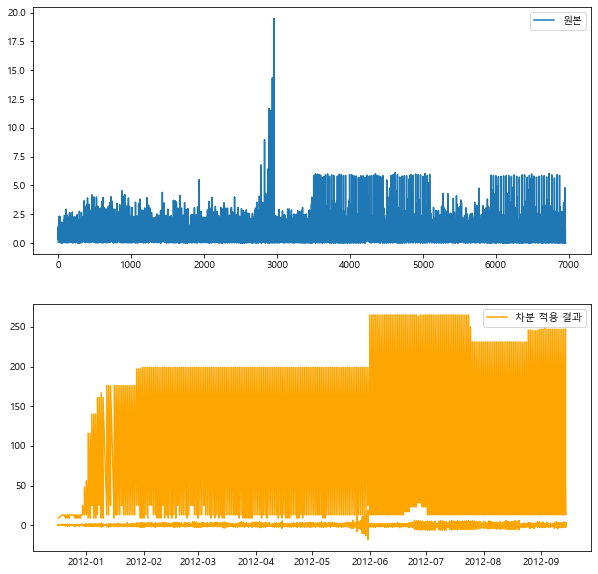

In [99]:
#차분 적용결과가 정상성을 띄는지 확인
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(df['total'])
plt.legend(['원본'])
plt.subplot(212)
plt.plot(diff_df,'orange')
plt.legend(['차분 적용 결과'])

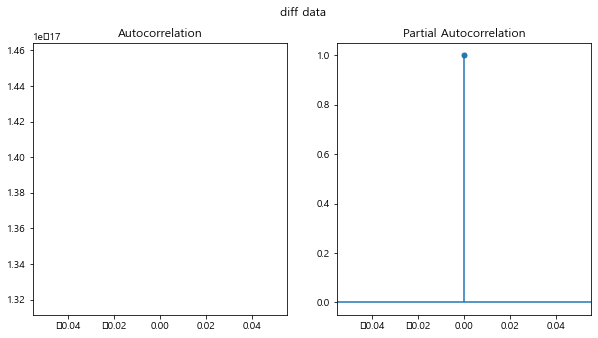

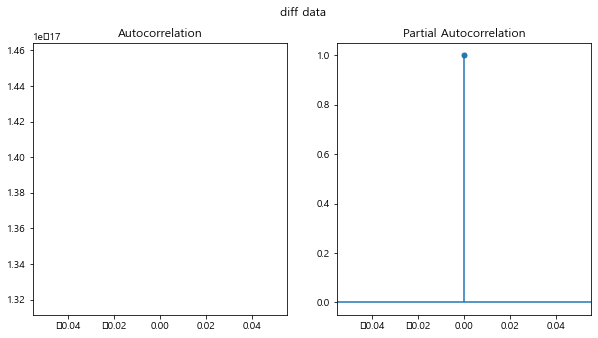

In [100]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('diff data')
sm.graphics.tsa.plot_acf(diff_df['total'].values.squeeze(), lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(diff_df['total'].values.squeeze(), lags=30, ax=ax[1])
#acf - die out, pacf - cut off (주관적 판단) - AR모델 적용

In [111]:
train2.columns

Index(['H_ID', 'HA', 'ST_DATE', 'APT_TF', 'H00', 'H01', 'H02', 'H03', 'H04',
       'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14',
       'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23', 'total'],
      dtype='object')

In [113]:
train2 = df[df['ST_DATE']<'2012-09-15']
train2.drop(['H_ID', 'HA', 'APT_TF', 'H00', 'H01', 'H02', 'H03', 'H04',
       'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14',
       'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23'], axis=1, inplace=True)
train2

,ST_DATE,total
0,2011-12-17,0.081
1,2011-12-19,1.392
2,2011-12-20,0.955
3,2011-12-21,0.266
4,2011-12-21,1.501
...,...,...
5918,2012-09-14,0.231
5919,2012-09-14,2.260
5920,2012-09-14,0.076
5921,2012-09-14,0.013


In [152]:
df2 = df[df['ST_DATE']<'2012-09-15']
df2.drop(['H_ID', 'HA', 'APT_TF', 'H00', 'H01', 'H02', 'H03', 'H04',
       'H05', 'H06', 'H07', 'H08', 'H09', 'H10', 'H11', 'H12', 'H13', 'H14',
       'H15', 'H16', 'H17', 'H18', 'H19', 'H20', 'H21', 'H22', 'H23'], axis=1, inplace=True)
df2

,ST_DATE,total
0,2011-12-17,0.081
1,2011-12-19,1.392
2,2011-12-20,0.955
3,2011-12-21,0.266
4,2011-12-21,1.501
...,...,...
5918,2012-09-14,0.231
5919,2012-09-14,2.260
5920,2012-09-14,0.076
5921,2012-09-14,0.013


In [153]:
#컬럼명 변경
df2.columns = ['ds', 'y']

# 데이터 타입 변경
df2['ds']= pd.to_datetime(df2['ds'])

# 모델 생성
model = Prophet()

# 모델 학습
model.fit(df2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [158]:
# train set 마지막 1년 날짜 생성
last_4month = list()
for i in range(1, 5):
    last_4month.append(['2011-%11d' % i])
last_4month = pd.DataFrame(last_4month, columns = ['ds'])
last_4month['ds']= pd.to_datetime(last_4month['ds'])

In [159]:
forecast = model.predict(last_4month)

In [160]:
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

          ds      yhat  yhat_lower  yhat_upper
0 2011-01-01 -0.700265   -1.992456    0.625390
1 2011-02-01 -0.695389   -1.938158    0.668318
2 2011-03-01 -0.572268   -1.859032    0.767877
3 2011-04-01 -0.468281   -1.827022    0.830239


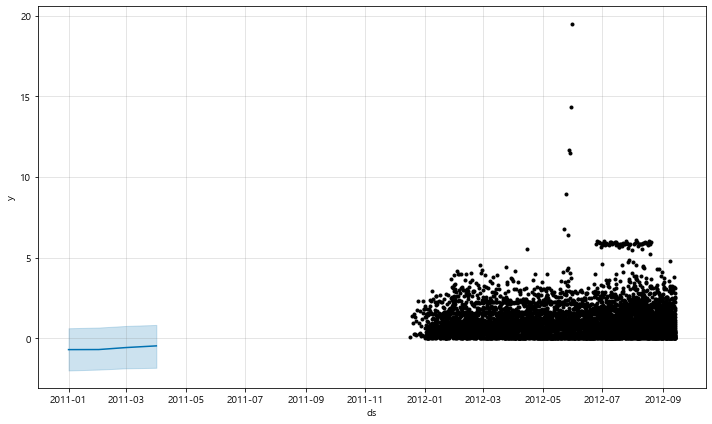

In [161]:
from matplotlib import pyplot
model.plot(forecast)
pyplot.show()

In [134]:
test2 = test.copy()
test2

,ST_DATE
5923,2012-09-15
5924,2012-09-15
5925,2012-09-15
5926,2012-09-15
5927,2012-09-15
...,...
6950,2012-10-14
6951,2012-10-14
6952,2012-10-14
6953,2012-10-14


In [137]:
test2.columns = ['ds']
test2

,ds
5923,2012-09-15
5924,2012-09-15
5925,2012-09-15
5926,2012-09-15
5927,2012-09-15
...,...
6950,2012-10-14
6951,2012-10-14
6952,2012-10-14
6953,2012-10-14


In [139]:
forecast = model.predict(test2)
y_pred = forecast['yhat'].values

In [143]:
answer.values

array([1.931, 0.232, 2.714, ..., 0.034, 0.051, 0.021])

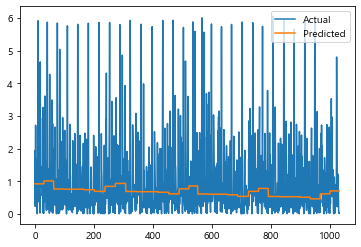

In [144]:
pyplot.plot(answer.values, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()


In [145]:
y_pred

array([0.92075111, 0.92075111, 0.92075111, ..., 0.70437384, 0.70437384,
       0.70437384])